Problem Statement:
About Company
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

Problem
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

In [26]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv("loan.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [28]:
df.shape

(614, 13)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [30]:
#drop reduntant column
df = df.drop('Loan_ID', axis = 'columns')
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [31]:
#Exploratory data analysis
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

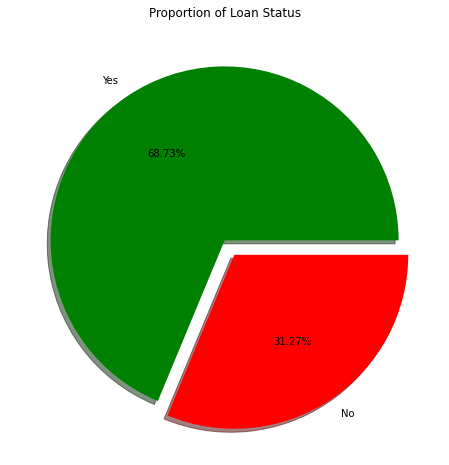

In [32]:
#pie chart
plt.figure(figsize =(12,8))
labels =['Yes','No']
sizes = df.Loan_Status.value_counts().values
explode = (0,0.1)
colors = ['green', 'red']
plt.pie(sizes , explode, labels, colors = colors, autopct = '%2.2f%%', shadow = True , startangle = 0)
plt.title("Proportion of Loan Status", size = 12)
plt.show()

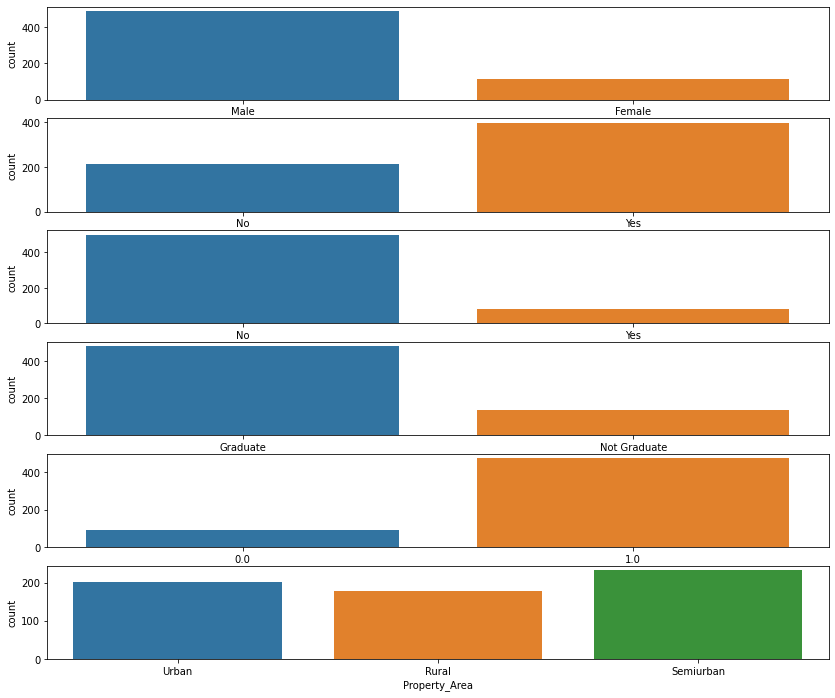

In [33]:
fig , ax = plt.subplots(nrows = 6, ncols = 1, figsize = (14,12))
cols = ['Gender', 'Married', 'Self_Employed', 'Education', 'Credit_History', 'Property_Area']
for r , c in enumerate(cols):
    sn.countplot(x = c , data = df, ax = ax[r])
plt.show()

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

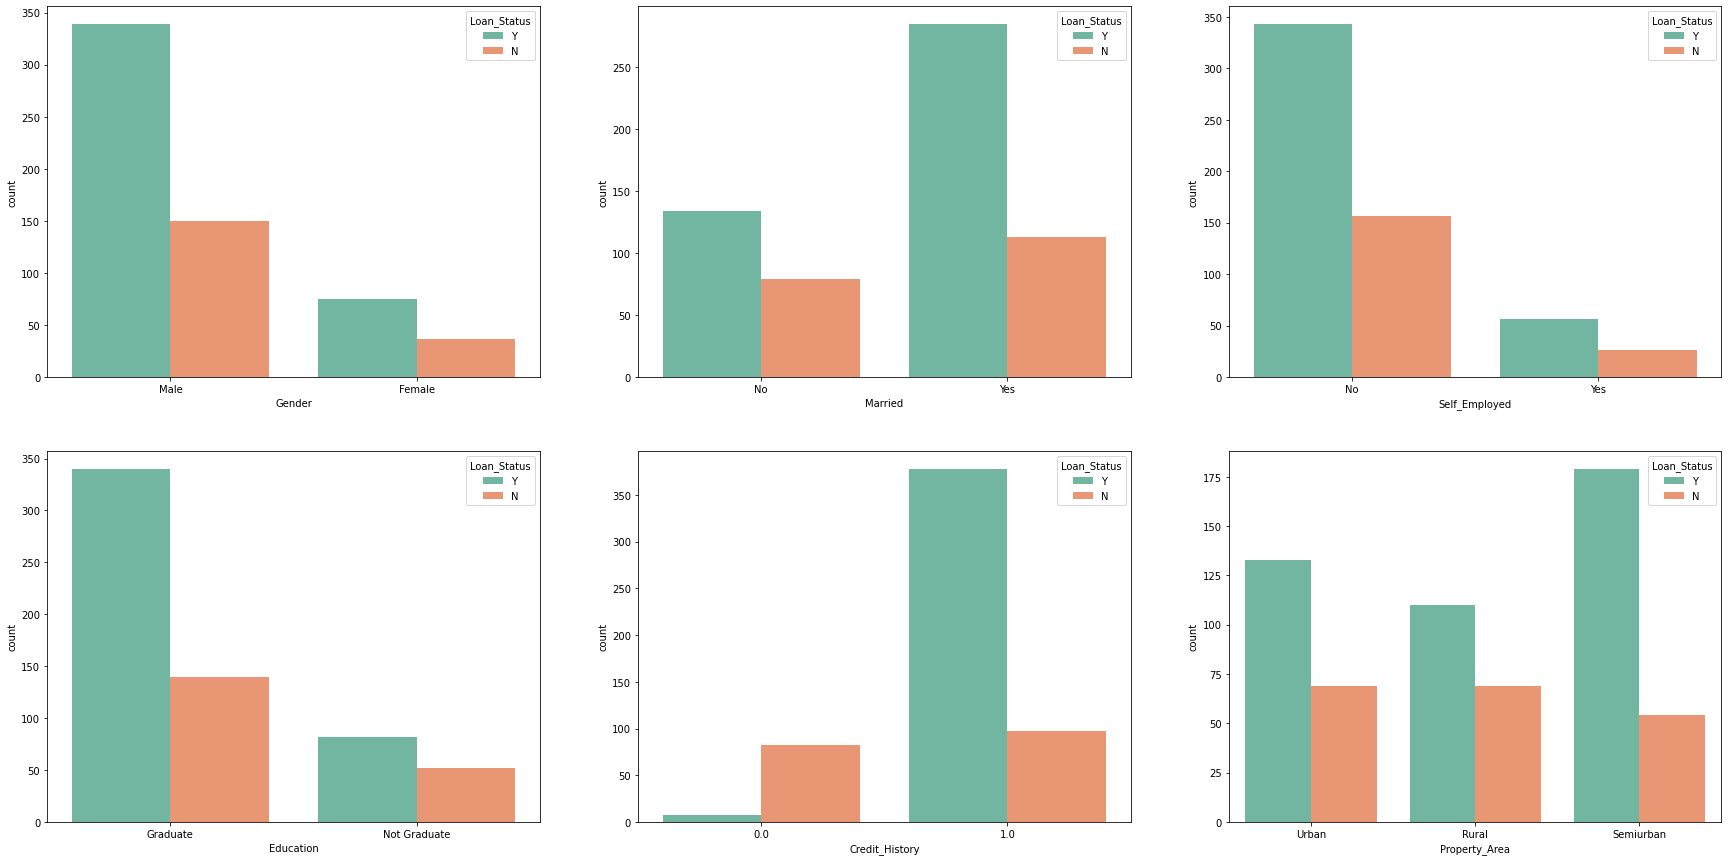

In [34]:
fig ,ax = plt.subplots(2,3 , figsize =(30,15))
sn.countplot(x = 'Gender' , hue = 'Loan_Status', data = df, palette = 'Set2', ax = ax[0][0])
sn.countplot(x = 'Married' , hue = 'Loan_Status', data = df, palette = 'Set2', ax = ax[0][1])
sn.countplot(x = 'Self_Employed' , hue = 'Loan_Status', data = df, palette = 'Set2', ax = ax[0][2])
sn.countplot(x = 'Education' , hue = 'Loan_Status', data = df, palette = 'Set2', ax = ax[1][0])
sn.countplot(x = 'Credit_History' , hue = 'Loan_Status', data = df, palette = 'Set2', ax = ax[1][1])
sn.countplot(x = 'Property_Area' , hue = 'Loan_Status', data = df, palette = 'Set2', ax = ax[1][2])


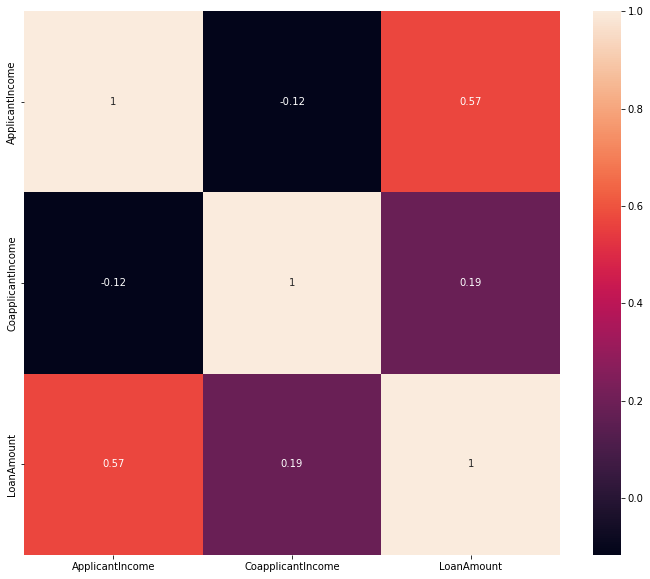

In [35]:
plt.figure(figsize = (12,10))
cols_num = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]
cor = cols_num.corr()
sn.heatmap(cor , annot = True)
plt.show()

In [36]:
#FeatureEngineering
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [47]:
#for checking the location of null values of gender
new_df = df[df.Gender.isna()]
new_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
188,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N
576,NaN,Yes,0,Graduate,No,3087,2210.0,136.0,360.0,0.0,Semiurban,N
588,NaN,No,0,Graduate,No,4750,0.0,94.0,360.0,1.0,Semiurban,Y


D:\ashwa\ana\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

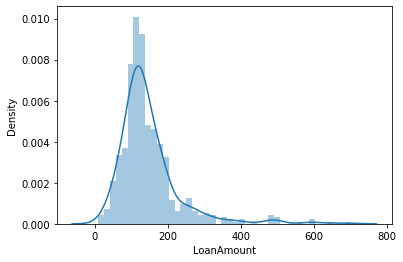

In [37]:
sn.distplot(df['LoanAmount'])

In [38]:
#outlier removal for LoanAmount
q1 = df.LoanAmount.quantile(0.25)
q3 = df.LoanAmount.quantile(0.75)
iqr = q3 - q1
df = df[(df.LoanAmount >= q1 - 1.5*iqr) & (df.LoanAmount <= q3+ 1.5*iqr) ]

In [39]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


D:\ashwa\ana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanAmount'>

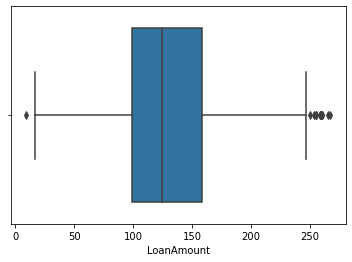

In [40]:
sn.boxplot(df.LoanAmount)

In [53]:
#handling missing values
df['Gender'].fillna(df.Gender.mode()[0], inplace = True)
df["Credit_History"].fillna(df.Credit_History.mode()[0], inplace = True)
df['Married'].fillna(df.Married.mode()[0], inplace = True)
df['Self_Employed'].fillna(df.Self_Employed.mode()[0], inplace = True)

In [55]:
df.isnull().sum()

Gender                0
Married               0
Dependents           13
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [58]:
df['Loan_Amount_Term'].fillna(df.Loan_Amount_Term.median(), inplace = True)
df['LoanAmount'].fillna(df.LoanAmount.median(), inplace = True)

In [59]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [63]:
#use labelEncoder for categorical variable
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [65]:
le_cols = ['Gender', 'Married', 'Education', 'Self_Employed','Property_Area','Loan_Status']
for i in le_cols:
    df[i] = le.fit_transform(df[i])

C:\Users\ashwa\AppData\Local\Temp/ipykernel_5872/3410311025.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = le.fit_transform(df[i])


In [66]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [70]:
x = df[['Gender', 'Married', 'Self_Employed', 'Credit_History', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]
y = df['Loan_Status']

In [71]:
x

,Gender,Married,Self_Employed,Credit_History,ApplicantIncome,CoapplicantIncome,LoanAmount
1,1,1,0,1.0,4583,1508.0,128.0
2,1,1,1,1.0,3000,0.0,66.0
3,1,1,0,1.0,2583,2358.0,120.0
4,1,0,0,1.0,6000,0.0,141.0
5,1,1,1,1.0,5417,4196.0,267.0
...,...,...,...,...,...,...,...
609,0,0,0,1.0,2900,0.0,71.0
610,1,1,0,1.0,4106,0.0,40.0
611,1,1,0,1.0,8072,240.0,253.0
612,1,1,0,1.0,7583,0.0,187.0


In [72]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 553, dtype: int32

In [73]:
from sklearn.model_selection import train_test_split

In [140]:
x_train,x_test, y_train,y_test = train_test_split(x, y , test_size = 0.25,random_state = 2)

In [141]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

In [142]:
dt = DecisionTreeClassifier(max_depth = 3, min_samples_split = 35)

In [143]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=35)

In [144]:
y_pred = dt.predict(x_test)

In [145]:
accuracy_score(y_test, y_pred)

0.7913669064748201

In [146]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.37      0.51        41
           1       0.79      0.97      0.87        98

    accuracy                           0.79       139
   macro avg       0.81      0.67      0.69       139
weighted avg       0.80      0.79      0.76       139



In [147]:
f1_score(y_test, y_pred)

0.867579908675799

Text(87.0, 0.5, 'Truth')

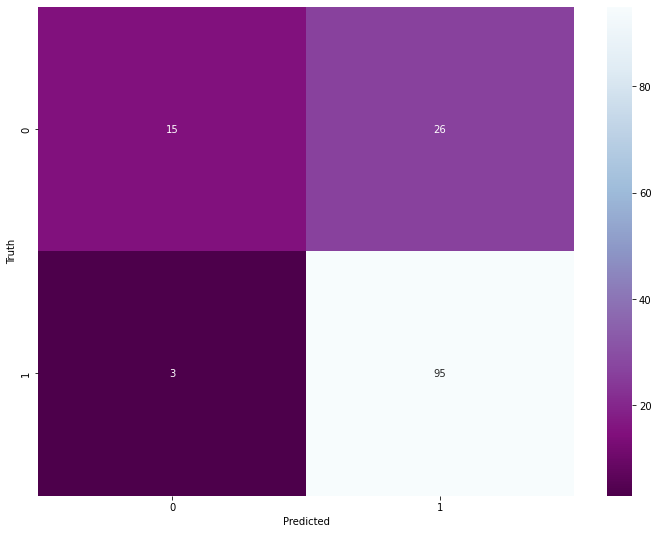

In [148]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (12,9))
sn.heatmap(cm, annot=True, cmap='BuPu_r')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [152]:
#other model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 20, min_samples_split = 10, min_samples_leaf= 4, max_features = 'auto', max_depth= 120, bootstrap=True) 
rf.fit( x_train, y_train)

RandomForestClassifier(max_depth=120, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=20)

In [153]:
rf_y_pred = rf.predict(x_test)

In [154]:
accuracy_score(y_test, rf_y_pred)

0.7841726618705036